In [ ]:
!pip install openai pillow

import os, base64, io
from PIL import Image
from IPython.display import display, Markdown

In [ ]:
from google.colab import userdata, drive
OPENAI_API_KEY = userdata.get("OPENAI_API_KEY")
drive.mount("/content/drive")

from openai import OpenAI
client = OpenAI(api_key=OPENAI_API_KEY)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_path = "/content/drive/Shareddrives/LL_CENTRAL/LL_PROJECTS/24.1/COLAB/ll_color_colabs/_ai_lab/utilities/input-folder/images/rainbow-test.jpg" # change the final image file to your image, if added to our input folder
query_text  = "Describe this image in one sentence, please make this as direct, tehcnical, and concise as possible. Write this description for a high-level academic audience."
model_name  = "gpt-4o"

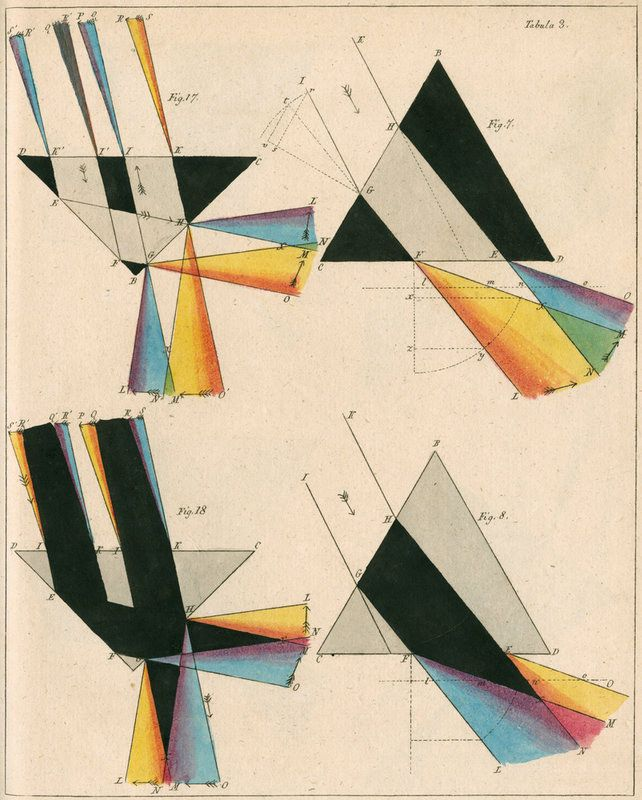

**rainbow-test.jpg** → The image depicts diagrams illustrating the dispersion of light through prisms, showing the refraction and splitting of light into its constituent colors with geometric annotations.

In [ ]:
def encode_image(path: str) -> str:
    """Return base-64 of the file at `path`."""
    with open(path, "rb") as f:
        return base64.b64encode(f.read()).decode("utf-8")


image_b64 = encode_image(image_path)

response = client.chat.completions.create(
    model=model_name,
    messages=[{
        "role": "user",
        "content": [
            {"type": "text", "text": query_text},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{image_b64}",
                    "detail": "auto"
                },
            },
        ],
    }],
)

display(Image.open(image_path))
display(Markdown(
    f"**{os.path.basename(image_path)}** → {response.choices[0].message.content}"
))